In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import  matplotlib.cm as cm
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
import matplotlib as mpl
%matplotlib inline

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_profiles
import functions_idealized
import functions_grid
import functions_realistic
import functions_plot
from salishsea_tools import nc_tools, viz_tools

In [76]:
path = '/ocean/imachuca/Canyons/results_mackenzie/idealized/upwelling_events/eventB_pulse10_bdy' 
gridT = xr.open_dataset(path+'/GYRE_1h_20170101_20170120_grid_T.nc')
gridU = xr.open_dataset(path+'/GYRE_1h_20170101_20170120_grid_U.nc')
gridV = xr.open_dataset(path+'/GYRE_1h_20170101_20170120_grid_V.nc')
gridW = xr.open_dataset(path+'/GYRE_1h_20170101_20170120_grid_W.nc')
mesh_mask = xr.open_dataset(path+'/mesh_mask.nc')

In [77]:
deptht = np.asfarray(gridT['deptht'])
utau = np.asfarray(gridU['sozotaux'])
vtau = np.asfarray(gridV['sometauy'])
time_counter = gridT['time_counter']

tmask0_rest = 1 - np.asfarray(mesh_mask['tmask'])[:]
time_len = time_counter.shape[0]
tmask_rest = np.tile(tmask0_rest, (time_len, 1, 1, 1))
U_vel = np.ma.array(np.asfarray(gridU['vozocrtx']), mask=tmask_rest)
V_vel = np.ma.array(np.asfarray(gridV['vomecrty']), mask=tmask_rest)

In [78]:
sal = nc.Dataset('../conditions/NEMO_files/salinity/salinity_doubled_20.nc')['vosaline']
tem = nc.Dataset('../conditions/NEMO_files/temperature/temperature_doubled_20.nc')['votemper']

In [3]:
bathy_file = nc.Dataset('../bathymetry/NEMO_files/idealized/ideal_bathy_05.nc')
bathy = bathy_file['Bathymetry']

grid = nc.Dataset('../coordinates/raw_coordinates/grid_02.nc')
lons = grid['grid_lons']
lats = grid['grid_lats']

# Dimensions

(0, 236)

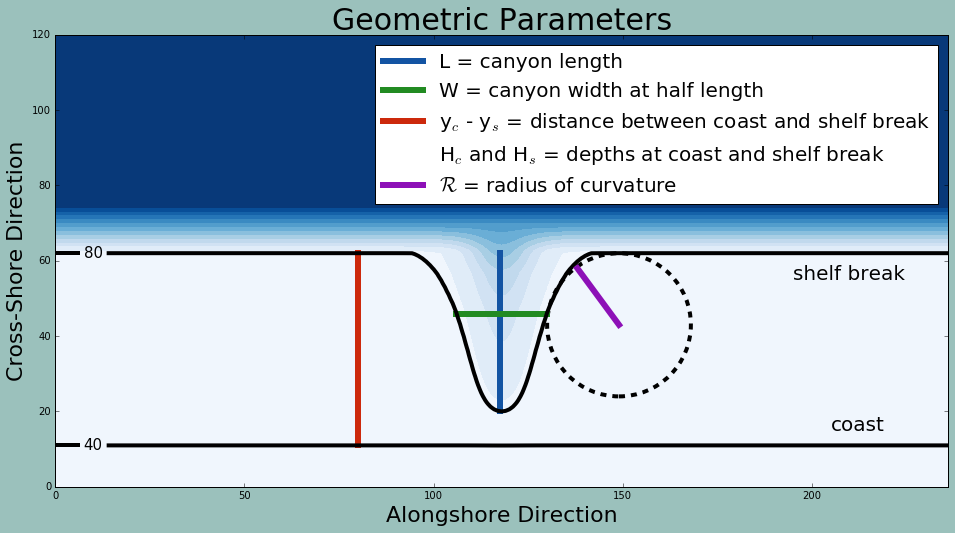

In [14]:
fig, ax = plt.subplots(1,1,figsize=(16, 16* 120/bathy.shape[1]))
ax.set_ylim([0,120])

(cmap, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmap_r = ListedColormap(cmap.colors[::-1])
c = ax.contourf(bathy[:,:], cmap = cm.Blues, linewidths=2, levels = np.arange(0, 1400, 100))

#ax.tick_params(
#    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',
#    left='off',
#labelleft='off',
#    labelbottom='off')
#ax.tick_params(
#    axis='y',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom='off',      # ticks along the bottom edge are off
#    top='off',
#    left='off',
#    labelleft='off',
#    labelbottom='off')

ax.set_ylabel('Cross-Shore Direction', fontsize=22)
ax.set_xlabel('Alongshore Direction', fontsize=22)
ax.set_title('Geometric Parameters', fontsize=30)
plt.gcf().set_facecolor('#9bc1bc')

lw0=4
lw=6

c0 = ax.contour(bathy[:,:], levels = [40,80], colors='k', linewidths=lw0)
ax.clabel(c0, inline=1, fontsize=15, fmt = '%1.0f')

from matplotlib.patches import Circle
circle = Circle((149, 43), 19, facecolor='none', edgecolor='k', linewidth=lw0, linestyle='--')
ax.add_patch(circle)

ax.plot([bathy.shape[-1]/2-1, bathy.shape[-1]/2-1],[20,62],'#1354a3', lw=lw, label='L = canyon length', zorder=1)
ax.plot([106,130],[46,46],'forestgreen', lw=lw, label = 'W = canyon width at half length', zorder=1)
ax.plot([80,80],[11,62],'#cc290c', lw=lw, label = 'y$_c$ - y$_s$ = distance between coast and shelf break', zorder=1)
ax.plot([0, 1],[0, 1], label='H$_c$ and H$_s$ = depths at coast and shelf break', zorder=1, c='white')
ax.plot([149,138],[43,58],'#8d10b7', lw=lw, label = '$\cal{R}$ = radius of curvature', zorder=2)
mpl.rcParams['legend.scatterpoints'] = 1
ax.legend(loc = 1, fontsize=20,numpoints=1)

ax.text(195,55,'shelf break', fontsize=20)
ax.text(205,15,'coast', fontsize=20)

ax.set_xlim([0, 236])
#fig.savefig('parameters.png', format='png', dpi=300, transparent=True)

# Bathy

In [6]:
mc = nc.Dataset('../bathymetry/NEMO_files/idealized/ideal_bathy_05.nc')['Bathymetry']
tiny = nc.Dataset('../bathymetry/NEMO_files/idealized/tiny_bathy.nc')['Bathymetry']
tiniest = nc.Dataset('../bathymetry/NEMO_files/idealized/tiniest_bathy.nc')['Bathymetry']

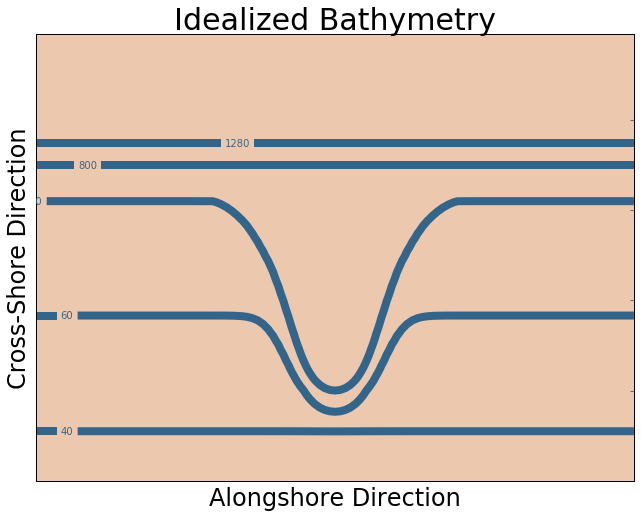

In [28]:
fig, ax = plt.subplots(1,1,figsize=(237/177*8, 8), sharex=True, sharey=True)
plt.tick_params(labelsize=10)
c = ax.contour(mc[0:100, 60:mc.shape[-1]-60], levels = [40, 60, 80, 800, 1280], colors='#33658a', linewidths=8)
ax.clabel(c, fontsize=10,inline=1, fmt = '%1.0f')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    left='off',
    labelleft='off',
    labelbottom='off')
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',
    left='off',
    labelleft='off',
    labelbottom='off')
ax.set_ylabel('Cross-Shore Direction', fontsize=24)
ax.set_xlabel('Alongshore Direction', fontsize=24)
ax.set_title('Idealized Bathymetry', fontsize=30)
#plt.gcf().set_facecolor('#9bc1bc')
#ax.set_axis_bgcolor('#ecc8af')
ax.patch.set_facecolor('#ecc8af')
#plt.gcf().set_facecolor('#ecc8af') 

fig.savefig('mackbath.png', format='png', dpi=300)

# Key Locations

In [ ]:
x_region, y_region, z_region = functions_plot.def_regionG(xl=-149, xr=-131, yb=68, yt=73)#functions_plot.def_regionS()

(cmap, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmap_r = ListedColormap(cmap.colors[::-1])

fig, ax = plt.subplots(1, 1, figsize=(15, 10)); ax.grid()
levels = [-1300, -825, -400, -80, -40, 0]
cs = ax.contour(x_region, y_region, z_region, colors='k', linestyles='solid', levels=levels, lw=2)
c = ax.contourf(x_region, y_region, z_region, cmap = cmap, linewidths=2, levels = np.arange(-4000, 2500, 100))
cb = fig.colorbar(c)
#ax.clabel(cs, inline=1, fontsize=14)
cb.set_label('Depths [m]', fontsize=20)

#ax.plot(lons, lats, linewidth=2, c='gray', alpha=0.5)
plt.tick_params(labelsize=20)

#ax.scatter([-133], [69.5], s=600, c='orangered', alpha=1)
#ax.scatter([-135.5], [69.6], s=600, c='orangered', alpha=1)
#ax.scatter([-139.61], [70.7], s=600, c='orangered', alpha=1)
#ax.text(-134.2, 69.7, 'Tuktoyaktuk', fontsize=16)
#ax.text(-137, 69.8, 'Pelly Island', fontsize=16)
#ax.text(-141, 70.9,'TS Profile', fontsize=16)
ax.set_xlim([-149, -131])
ax.set_ylim([68, 73])
ax.set_ylabel('Latitudes', fontsize=20)
ax.set_xlabel('Longitudes', fontsize=20)
#ax.set_title('Mackenzie Canyon Model Domain', fontsize=30)
#plt.savefig('windstations.png')
plt.gcf().set_facecolor('#9bc1bc') 

cb.ax.tick_params(labelsize=15)

fig.savefig('mackenzie.png', format='png', transparent=True, dpi=300)

#plt.savefig('mackenzie.svg', format='svg', dpi=300)

# Grid

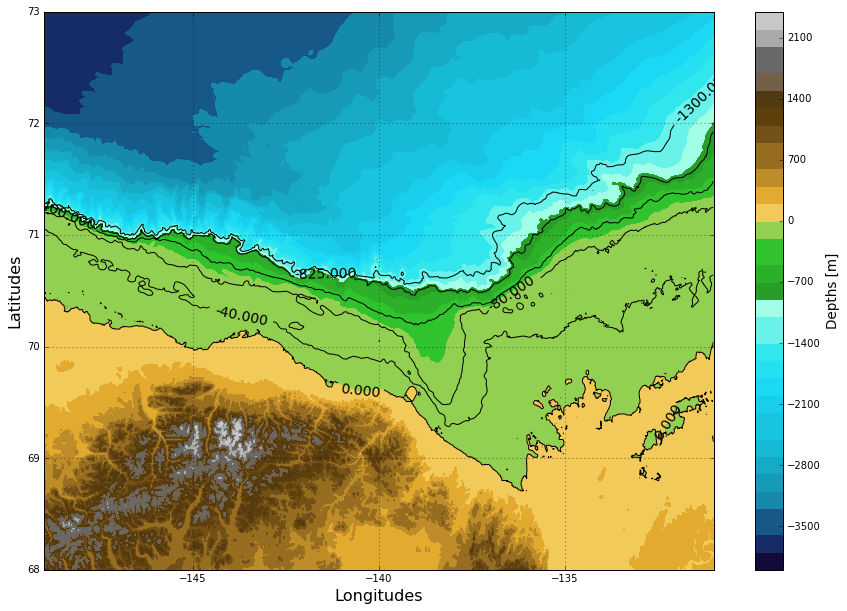

In [7]:
x_region, y_region, z_region = functions_plot.def_regionG(xl=-149, xr=-131, yb=68, yt=73)#functions_plot.def_regionS()

(cmap, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmap_r = ListedColormap(cmap.colors[::-1])

fig, ax = plt.subplots(1, 1, figsize=(15, 10)); ax.grid()
levels = [-1300, -825, -400, -80, -40, 0]
cs = ax.contour(x_region, y_region, z_region, colors='k', linestyles='solid', levels=levels, lw=2)
c = ax.contourf(x_region, y_region, z_region, cmap = cmap, linewidths=2, levels = np.arange(-4000, 2500, 100))
cb = fig.colorbar(c)
ax.clabel(cs, inline=1, fontsize=14)
cb.set_label('Depths [m]', fontsize=13.5)

#ax.plot(lons[::20], lats[::20], linewidth=2, c='gray', alpha=0.7)
#ax.set_title('Map of Mackenzie Canyon', fontsize=22)
#ax.scatter([-133], [69.5], s=200, c='orangered', alpha=1)
#ax.text(-134.2, 69.8, 'Tuktoyaktuk', fontsize=16)
ax.set_xlim([-149, -131])
ax.set_ylim([68, 73])
ax.set_ylabel('Latitudes', fontsize=16)
ax.set_xlabel('Longitudes', fontsize=16)
plt.savefig('mackenziemap.png')
#plt.show()

In [158]:
ideal.shape[-1]

237

(400, 0)

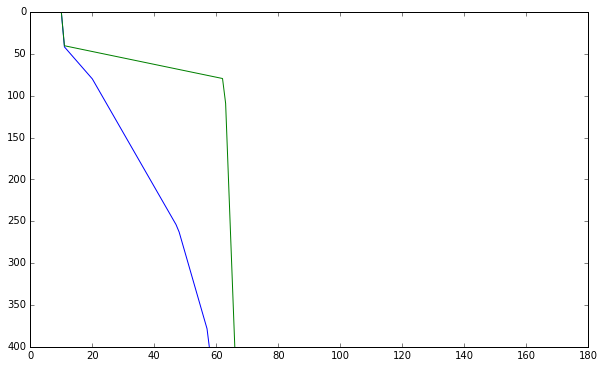

In [161]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.plot(np.arange(ideal.shape[0]), ideal[:,int(ideal.shape[-1]/2)])
ax.plot(np.arange(ideal.shape[0]), ideal[:,200])
ax.set_ylim(400,0)

# Initial Conditions

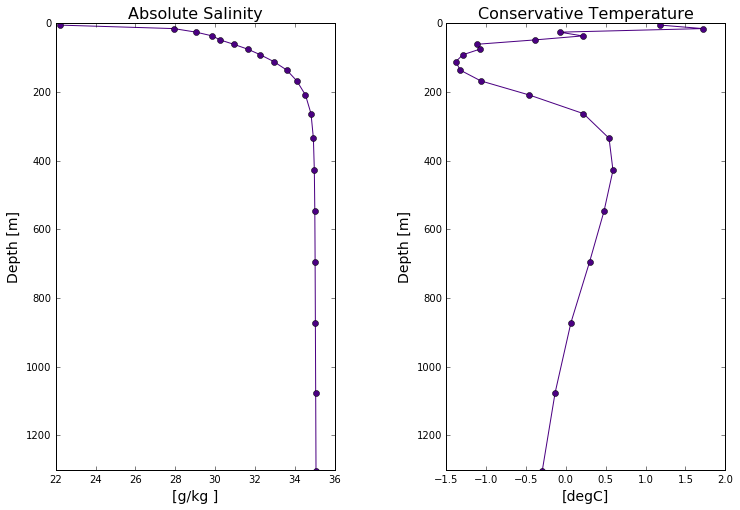

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12, 8))
ttls = ['Absolute Salinity','Conservative Temperature']
for ax, var, ttl in zip([ax1, ax2], [sal,tem], ttls):
    ax.plot(var[0,:,0,0], deptht, marker='o', color='indigo')
    ax.set_ylim([1300, 0])
    ax.set_title(ttl, fontsize=16)
    ax.set_ylabel('Depth [m]', fontsize=14)
ax1.set_xlabel('[g/kg ]', fontsize=14)
ax2.set_xlabel('[degC]', fontsize=14)
fig.subplots_adjust(wspace=0.4)
plt.savefig('initialconditions.png')

# Wind Forcing

In [19]:
def load_month(filename):
    data = pd.read_csv(filename, skiprows=16, encoding='ISO-8859-1')
    return data

def convert_times(dates):
    times_all = []
    for ii in range(0, len(dates)):
        times_new = datetime.strptime(dates[ii], '%Y-%m-%d %H:%M')
        times_all.append(times_new)
    return times_all

def get_data_day(data, day):
    wind_speed = np.array(data['Wind Spd (km/h)'])
    wind_dir = np.array(data['Wind Dir (10s deg)']) #
    date_time = np.array(data['Date/Time'])
    day_index = np.where(data['Day']==day)   
    dates_day = convert_times(date_time[day_index])
    
    wind_speed_day = wind_speed[day_index] * 1000 / 3600
    wind_dir_day = wind_dir[day_index] * 10 #
    return dates_day, wind_speed_day, wind_dir_day

def get_data_range(data, days_start, days_end):
    n_hours = 24
    days_range = np.arange(days_start,days_end+1)
    wind_speed_range = np.zeros((len(days_range),n_hours))
    wind_dir_range = np.zeros_like(wind_speed_range) #
    dates_range = []
    for day, n in zip(days_range, np.arange(len(wind_speed_range))):
        dates_day, wind_speed_day, wind_dir_day = get_data_day(data, day) #
        wind_speed_range[n, :] = wind_speed_day
        wind_dir_range[n, :] = wind_dir_day #
        dates_range = np.append(dates_range, dates_day)
    wind_speed_range = wind_speed_range.flatten()
    wind_dir_range = wind_dir_range.flatten() #
    return dates_range, wind_speed_range, wind_dir_range

def convert_wind_stress(wind_speed_range):
    wind_stress_range = 1.25 * (1.5 * 10**-3) * (wind_speed_range**2)
    return wind_stress_range

def convert_angle_component(speed, angle):
    xcomp = -1 * speed * np.sin(np.deg2rad(angle))
    return xcomp

def combine_ranges(data_list, start_list, end_list):
    date_all = []
    speed_all = []
    stress_all = []

    for data, start, end in zip(data_list, start_list, end_list):
        dates, speed, direc = get_data_range(data, start, end) #
        stress = convert_wind_stress(speed)
        stress_x = convert_angle_component(stress, direc) #
        

        date_all = np.append(date_all, dates)
        speed_all = np.append(speed_all, speed)
        stress_all = np.append(stress_all, stress_x)
    
    return date_all, speed_all, stress_all

def plot_range(ax, dates, wind_stress, ymin = -0.3, ymax=0.3):
    ax.plot(dates, wind_stress, linewidth=1.5, color='royalblue')
    ax.yaxis.grid()
    ax.set_ylim([ymin, ymax])
    ax.axhline(0, c='k')
    return ax

def upwelling_event(ax, date_all, year, month, day, hr, label, inds, ev, y=-0.14):
    if ev == 'upw':
        c = 'indianred'
    elif ev == 'wnd':
        c = 'indigo'
    elif ev == 'wnd2':
        c = 'orchid'
    elif ev == 'dta':
        c = 'darkgreen'
    else:
        c = 'k'
    ind = np.where(date_all == datetime(year, month, day, hr, 0))[0][0]
    ax.axvline(date_all[ind], color=c, linewidth=3.5)
    ax.text(date_all[ind+inds], y, label, rotation=90, fontsize=16)
    return ax

In [20]:
nov87 = load_month('../conditions/data/for_atmospheric_forcing/eng-hourly-11011987-11301987.csv')
oct87 = load_month('../conditions/data/for_atmospheric_forcing/eng-hourly-10011987-10311987.csv')

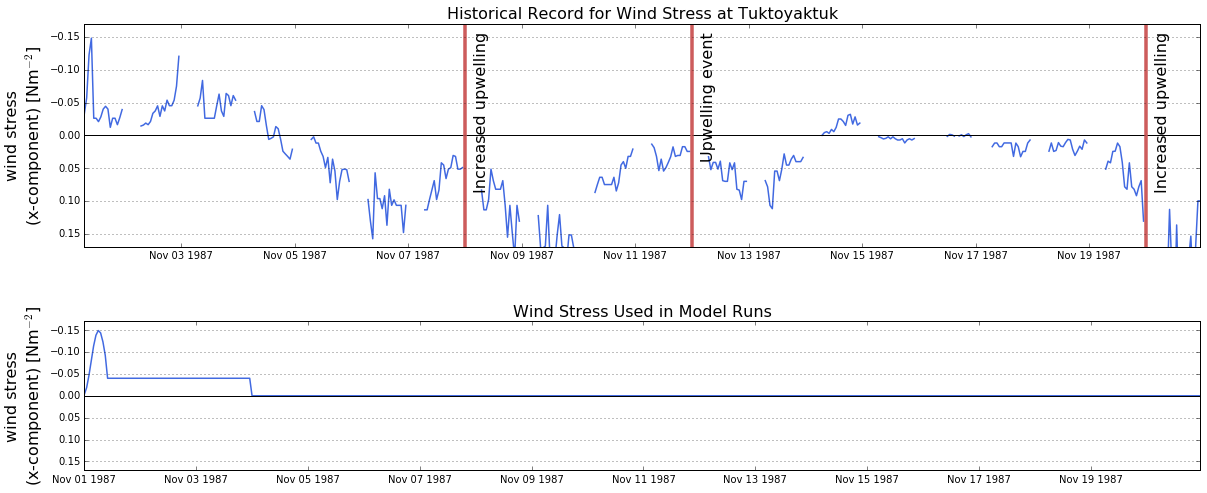

In [21]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 1,height_ratios=[3, 2])

ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

data_list = [nov87]
start_list = [1]
end_list = [20]
date_all, speed_all, stress_all = combine_ranges(data_list, start_list, end_list)
ax = plot_range(ax, date_all, -1 * stress_all, -0.18, 0.18)
ax = upwelling_event(ax, date_all, 1987, 11, 12, 0, 'Upwelling event', 4, 'upw')
ax = upwelling_event(ax, date_all, 1987, 11, 8, 0, 'Increased upwelling', 4, 'upw')
ax = upwelling_event(ax, date_all, 1987, 11, 20, 0, 'Increased upwelling', 4, 'upw')
ax.set_title('Historical Record for Wind Stress at Tuktoyaktuk', fontsize=16)
ax.set_ylim([0.17, -0.17])
ax.set_ylabel('wind stress\n(x-component) [Nm$^{-2}$]', fontsize=16)

ax2 = plot_range(ax2, date_all, utau[:,0,0], -0.18, 0.18)
ax2.set_ylim([0.17, -0.17])
ax2.set_ylabel('wind stress\n(x-component) [Nm$^{-2}$]', fontsize=16)
ax2.set_title('Wind Stress Used in Model Runs', fontsize=16)

fig.subplots_adjust(hspace=0.4)

#plt.savefig('windforcing.png')

# Boundary Conditions

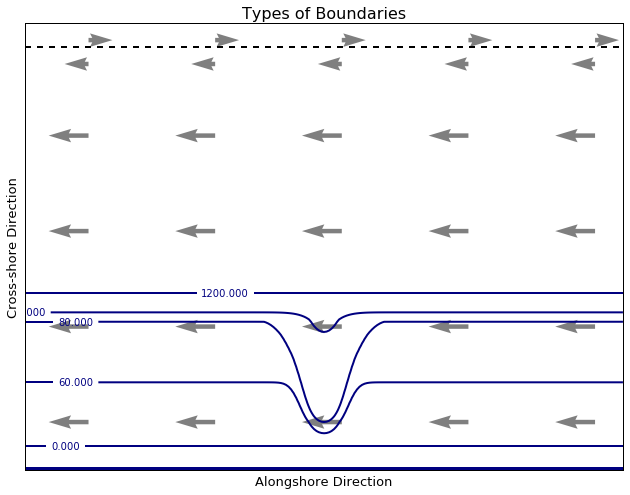

In [22]:
fig, ax = plt.subplots(1,1,figsize=(237/177*8,8))
c = ax.contour(ideal[:,:], levels = [0, 60, 80, 400, 1200], colors = 'navy', linewidths=2)
ax.clabel(c, inline=1, fontsize=10)
ax.axhline(0, lw=6, c='navy')

def make_quiver(y, u, v):
    X = np.arange(25, 226, 50)
    Y = np.ones(len(X)) * y
    U = np.ones(len(X)) * u
    V = np.ones(len(X)) * v
    ax.quiver(X,Y,U,V, alpha=0.5, scale=150)

make_quiver(20, -10, 0)
make_quiver(60, -10, 0)
make_quiver(100, -10, 0)
make_quiver(140, -10, 0)

make_quiver(170, -6, 0)
make_quiver(180, 6, 0)

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax.set_title('Types of Boundaries', fontsize=16)
plt.xlabel('Alongshore Direction', fontsize=13)
plt.ylabel('Cross-shore Direction', fontsize=13)

ax.set_ylim([0, ideal.shape[0]+10])
ax.axhline(ideal.shape[0], c='k', linewidth=2, linestyle='--')

#plt.savefig('boundaryconditions.png')

# Preliminary Results

In [80]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

dep=6

U_vel_smooth = np.zeros([U_vel.shape[0], 1, U_vel.shape[2], U_vel.shape[3]])
V_vel_smooth = np.zeros_like(U_vel_smooth)

for i in range(U_vel.shape[3]):
    for j in range(U_vel.shape[2]):
        U_vel_smooth[:, 0, j, i] = smooth(U_vel[:,dep, j, i], 24)
        V_vel_smooth[:, 0, j, i] = smooth(V_vel[:,dep, j, i], 24)

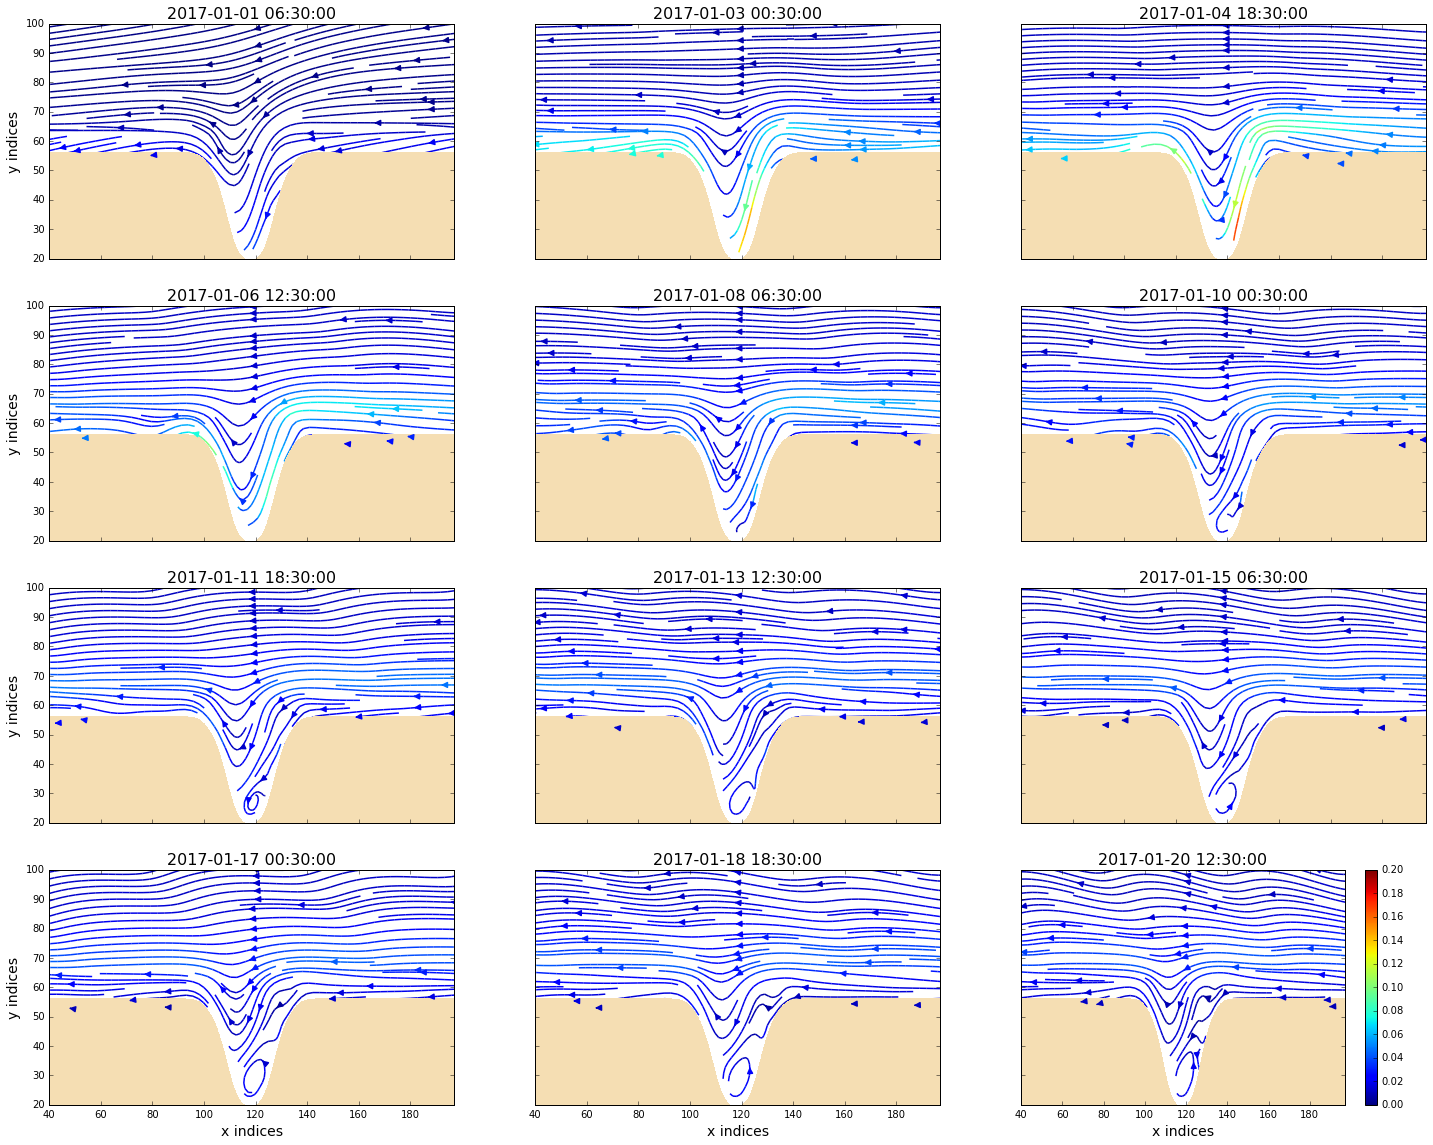

In [64]:
fig, ax = plt.subplots(1,1,figsize=(5, 5), sharex=True, sharey=True)
ax = ax.flatten()
time_inds = np.arange(6,480,42)
arrow, dep, max_vel = 3, 6, 0.2
dates = time_counter.to_pandas()
for n, time_ind in zip(np.arange(12), time_inds):
    x_slice, y_slice, u_nstg0, v_nstg0, speeds = functions_profiles.get_speeds(U_vel_smooth, V_vel_smooth, 0, time_ind, arrow)
    #q = ax[n].quiver(x_slice, y_slice, u_nstg, v_nstg, speeds, clim=[0,max_vel],
    #                      pivot='tip', cmap='Spectral_r', headwidth=3, width=0.01)
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=0, vmax=max_vel)
    u_nstg = np.ma.array(u_nstg0, mask=tmask_rest[0,dep,::arrow, ::arrow])
    v_nstg = np.ma.array(v_nstg0, mask=tmask_rest[0,dep,::arrow, ::arrow])
    strm = ax[n].streamplot(x_slice, y_slice, u_nstg, v_nstg,
                     color=speeds, cmap=cm.jet, density=3.0, linewidth=1.5, norm=norm, arrowsize=1.2)
    ax[n].set_ylim(20, 100)
    ax[n].set_xlim(40, U_vel.shape[-1]-40)
    dep_m = round(deptht[dep],1)
    viz_tools.plot_land_mask(ax[n], bathy_file,'grid', dep_m, None, None, 'wheat')
    ax[n].set_title(dates[time_ind], fontsize=16)
    if n==0 or n==3 or n==6 or n==9:
        ax[n].set_ylabel('y indices', fontsize=14)
    if n==9 or n==10 or n==11:
        ax[n].set_xlabel('x indices', fontsize=14)
fig.colorbar(strm.lines)
fig.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.2)
#plt.savefig('preresultsflow.png')

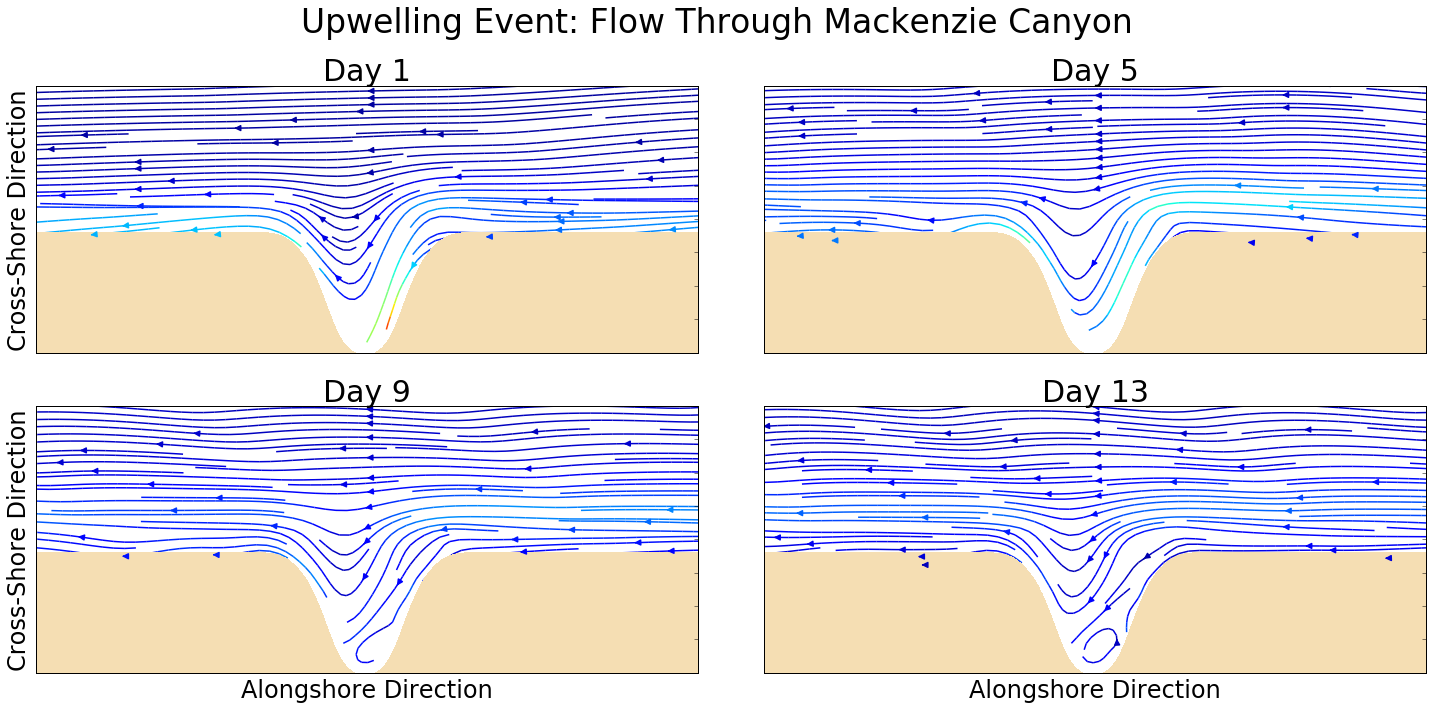

In [99]:
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=True, sharey=True)
ax = ax.flatten()
plt.tick_params(labelsize=16)
days = np.arange(1,14,4)
arrow, dep, max_vel = 3, 6, 0.2
dates = time_counter.to_pandas()



for n, day in zip(np.arange(12), days):
    ax[n].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',
        left='off',
        labelleft='off',
        labelbottom='off')
    ax[n].tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',
        left='off',
        labelleft='off',
        labelbottom='off')
    time_inds = np.arange(day*24, (day+1)*24, 3)
    u_nstg_all = np.zeros([len(time_inds), 59, 79])
    v_nstg_all = np.zeros_like(u_nstg_all)
    speeds_all = np.zeros_like(u_nstg_all)
    for m, time_ind in zip(np.arange(len(time_inds)), time_inds):
        x_slice, y_slice, u_nstg0, v_nstg0, speeds0 = functions_profiles.get_speeds(U_vel_smooth, V_vel_smooth, 0, time_ind, arrow)
        u_nstg_all[m,:,:] = u_nstg0
        v_nstg_all[m,:,:] = v_nstg0
        speeds_all[m,:,:] = speeds0
    u_nstg = np.mean(u_nstg_all, axis=0)
    v_nstg = np.mean(v_nstg_all, axis=0)
    speeds = np.mean(speeds_all, axis=0)
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=0, vmax=max_vel)
    u_nstg = np.ma.array(u_nstg, mask=tmask_rest[0,dep,::arrow, ::arrow])
    v_nstg = np.ma.array(v_nstg, mask=tmask_rest[0,dep,::arrow, ::arrow])
    strm = ax[n].streamplot(x_slice, y_slice, u_nstg, v_nstg,
                     color=speeds, cmap=cm.jet, density=3.0, linewidth=1.5, norm=norm, arrowsize=1.2)
    ax[n].set_ylim(20, 100)
    ax[n].set_xlim(40, U_vel.shape[-1]-40)
    dep_m = round(deptht[dep],1)
    viz_tools.plot_land_mask(ax[n], bathy_file,'grid', dep_m, None, None, 'wheat')
    ax[n].set_title('Day '+str(day), fontsize=30)
    if n==0 or n==2 or n==6 or n==9:
        ax[n].set_ylabel('Cross-Shore Direction', fontsize=24)
    if n==2 or n==3 or n==11:
        ax[n].set_xlabel('Alongshore Direction', fontsize=24)
    fig.suptitle('Upwelling Event: Flow Through Mackenzie Canyon', fontsize=33)
#cbar = fig.colorbar(strm.lines)
#cbar.set_label('speeds [m/s]', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.2)
plt.subplots_adjust(top=0.87)

fig.savefig('flow.png', format='png', dpi=300)

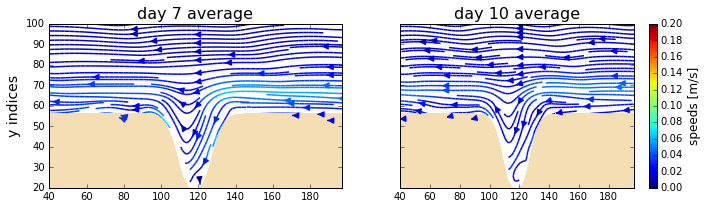

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10, 3), sharex=True, sharey=True)
ax = ax.flatten()
days = [7,10]
arrow, dep, max_vel = 3, 6, 0.2
dates = time_counter.to_pandas()
for n, day in zip(np.arange(2), days):
    time_inds = np.arange(day*24, (day+1)*24, 3)
    u_nstg_all = np.zeros([len(time_inds), 59, 79])
    v_nstg_all = np.zeros_like(u_nstg_all)
    speeds_all = np.zeros_like(u_nstg_all)
    for m, time_ind in zip(np.arange(len(time_inds)), time_inds):
        x_slice, y_slice, u_nstg0, v_nstg0, speeds0 = functions_profiles.get_speeds(U_vel_smooth, V_vel_smooth, 0, time_ind, arrow)
        u_nstg_all[m,:,:] = u_nstg0
        v_nstg_all[m,:,:] = v_nstg0
        speeds_all[m,:,:] = speeds0
    u_nstg = np.mean(u_nstg_all, axis=0)
    v_nstg = np.mean(v_nstg_all, axis=0)
    speeds = np.mean(speeds_all, axis=0)
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=0, vmax=max_vel)
    u_nstg = np.ma.array(u_nstg, mask=tmask_rest[0,dep,::arrow, ::arrow])
    v_nstg = np.ma.array(v_nstg, mask=tmask_rest[0,dep,::arrow, ::arrow])
    strm = ax[n].streamplot(x_slice, y_slice, u_nstg, v_nstg,
                     color=speeds, cmap=cm.jet, density=3.0, linewidth=1.5, norm=norm, arrowsize=1.2)
    ax[n].set_ylim(20, 100)
    ax[n].set_xlim(40, U_vel.shape[-1]-40)
    dep_m = round(deptht[dep],1)
    viz_tools.plot_land_mask(ax[n], bathy_file,'grid', dep_m, None, None, 'wheat')
    ax[n].set_title('day '+str(day)+ ' average', fontsize=16)
    if n==0 or n==3 or n==6 or n==9:
        ax[n].set_ylabel('y indices', fontsize=14)
    if n==9 or n==10 or n==11:
        ax[n].set_xlabel('x indices', fontsize=14)
cbar = fig.colorbar(strm.lines)
cbar.set_label('speeds [m/s]', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.2)

In [41]:
uvw = nc.Dataset('/ocean/kramosmu/MITgcm/TracerExperiments/LOWEST_BF/run02/stateGlob.nc')

In [51]:
U_vel_smooth = uvw.variables['U']
V_vel_smooth = uvw.variables['V']
wgrid = uvw.variables['W']
z = uvw.variables['Z']
x = uvw.variables['X']
x1 = uvw.variables['Xp1']
y1 = uvw.variables['Yp1']
y = uvw.variables['Y']
t = uvw.variables['T']

In [52]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

dep=15

In [60]:
uvw

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    build_date: Mon May 29 16:07:57 PDT 2017
    build_user: kramosmu
    MITgcm_URL: http://mitgcm.org
    build_host: seawolf3
    MITgcm_tag_id: 1.2176 2015/08/26
    Nx: 360
    Ny: 360
    sNx: 30
    nPy: 4
    nPx: 4
    MITgcm_version: checkpoint65n
    OLx: 3
    OLy: 3
    Nr: 90
    sNy: 30
    MITgcm_mnc_ver: 0.9
    nSx: 3
    nSy: 3
    history: Tue May 30 15:49:49 2017: ncks -4 -L4 -O stateGlob.nc stateGlob.nc
    NCO: "4.5.2"
    dimensions(sizes): T(19), Y(360), X(360), Z(90), Xp1(361), Yp1(361), Zl(90)
    variables(dimensions): float32 Eta(T,Y,X), float32 S(T,Z,Y,X), float64 T(T), float32 Temp(T,Z,Y,X), float32 U(T,Z,Y,Xp1), float32 V(T,Z,Yp1,X), float32 W(T,Zl,Y,X), float64 X(X), float64 Xp1(Xp1), float64 Y(Y), float64 Yp1(Yp1), float64 Z(Z), float64 Zl(Zl), int32 iter(T)
    groups: 

In [61]:
x_slice, y_slice, u_nstg0, v_nstg0, speeds = functions_profiles.get_speeds(U_vel_smooth, V_vel_smooth, 0, 4, 4)

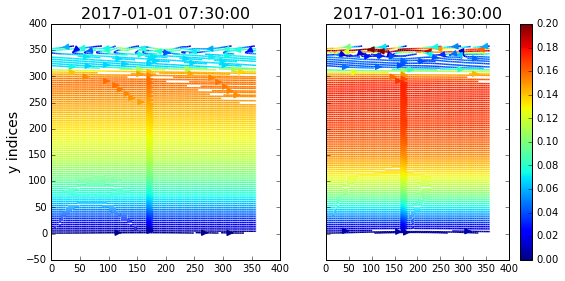

In [63]:
fig, ax = plt.subplots(1,2,figsize=(8, 4), sharex=True, sharey=True)
ax = ax.flatten()
time_inds = [7, 16]
arrow, dep, max_vel = 3, 6, 0.2
dates = time_counter.to_pandas()
for n, time_ind in zip(np.arange(12), time_inds):
    x_slice, y_slice, u_nstg, v_nstg, speeds = functions_profiles.get_speeds(U_vel_smooth, V_vel_smooth, 0, time_ind, arrow)
    #q = ax[n].quiver(x_slice, y_slice, u_nstg, v_nstg, speeds, clim=[0,max_vel],
    #                      pivot='tip', cmap='Spectral_r', headwidth=3, width=0.01)
    cmap = mpl.cm.jet
    norm = mpl.colors.Normalize(vmin=0, vmax=max_vel)
    #u_nstg = np.ma.array(u_nstg0, mask=tmask_rest[0,dep,::arrow, ::arrow])
    #v_nstg = np.ma.array(v_nstg0, mask=tmask_rest[0,dep,::arrow, ::arrow])
    strm = ax[n].streamplot(x_slice, y_slice, u_nstg, v_nstg,
                     color=speeds, cmap=cm.jet, density=3.0, linewidth=1.5, norm=norm, arrowsize=1.2)
    #ax[n].set_ylim(20, 100)
    #ax[n].set_xlim(40, U_vel.shape[-1]-40)
    #dep_m = round(deptht[dep],1)
    #viz_tools.plot_land_mask(ax[n], bathy_file,'grid', dep_m, None, None, 'wheat')
    ax[n].set_title(dates[time_ind], fontsize=16)
    if n==0 or n==3 or n==6 or n==9:
        ax[n].set_ylabel('y indices', fontsize=14)
    if n==9 or n==10 or n==11:
        ax[n].set_xlabel('x indices', fontsize=14)
fig.colorbar(strm.lines)
fig.tight_layout()
fig.subplots_adjust(wspace=0.2, hspace=0.2)
#plt.savefig('preresultsflow.png')

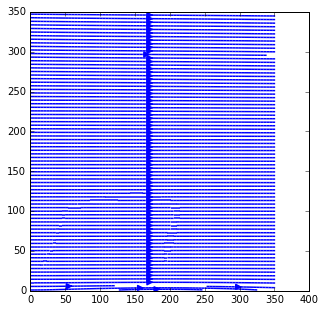

In [73]:
fig, ax =plt.subplots(1,1,figsize=(5,5))
x_slice, y_slice, u_nstg, v_nstg, speeds = functions_profiles.get_speeds(U_vel_smooth, V_vel_smooth, 0, time_ind, arrow)
strm = ax.streamplot(x_slice, y_slice, u_nstg, v_nstg, density=3.0, linewidth=1.5, arrowsize=1.2)

In [70]:
U_vel_smooth.shape

(19, 90, 360, 361)